https://www.notion.so/project_1-3_team-B_hui_250123-cae2505ee80f4ff0b43a9a499d0aca26

In [2]:
# 라이브러리 설치
!pip install koreanize-matplotlib
!pip install youtube-transcript-api
!pip install google-api-python-client pandas isodate
!pip install pytrends
!pip install pytrends matplotlib
!pip install beautifulsoup4 requests
!pip install konlpy

# Colab 한글폰트 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
!apt install fonts-nanum fonts-nanum-extra
mpl.font_manager.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
mpl.rc('font', family='NanumGothic')
plt.rc("axes", unicode_minus=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.3/622.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 41.7 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-extra
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 31.4 MB of archives.
After this operation, 120 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0 MB]
Fetched 31.4 MB in 1s (23.7 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124561 files and directories cur

In [ ]:
# prompt: all_reviews_with_mapping_competitor 파일에서 SaaS, Review ID, Comment, Pros, Cons 만 추출해서 csv 로 저장

import pandas as pd

try:
    df = pd.read_csv('all_reviews_with_mapping_competitor.csv')

    # 필요한 열만 선택
    df_selected = df[['SaaS', 'Review ID', 'Comment', 'Pros', 'Cons']]

    # CSV 파일로 저장
    df_selected.to_csv('extracted_reviews.csv', index=False, encoding='utf-8-sig')
    print("Successfully extracted and saved to extracted_reviews.csv")
except FileNotFoundError:
    print("Error: all_reviews_with_mapping_competitor.csv not found.")
except KeyError as e:
    print(f"Error: Column '{e}' not found in the CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully extracted and saved to extracted_reviews.csv


토픽 모델링- LSI

In [ ]:
# prompt: LSI 기법을 활용해서 extracted_reviews 파일에서 "SaaS" 별로 "Comment", "Pros", "Cons" 를 토픽모델링 진행하여 각 5개 토픽 추출 (상위 5개 키워드만)

from gensim import corpora, models
from konlpy.tag import Okt
import pandas as pd

try:
    df = pd.read_csv('extracted_reviews.csv')
    okt = Okt()

    def preprocess_text(text):
        if isinstance(text, str):  # Check if the input is a string
            tokens = okt.nouns(text)
            return [token for token in tokens if len(token) > 1]  # Remove single-character tokens
        else:
            return []  # Return an empty list for non-string inputs


    for saas in df['SaaS'].unique():
        saas_df = df[df['SaaS'] == saas]
        for column in ['Comment', 'Pros', 'Cons']:
            texts = saas_df[column].astype(str).apply(preprocess_text).tolist()  # Ensure the column is treated as strings

            dictionary = corpora.Dictionary(texts)
            corpus = [dictionary.doc2bow(text) for text in texts]
            lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=5)

            print(f"Top 5 topics for {saas} - {column}:")
            for topic in lsi.print_topics(num_topics=5, num_words=5):
                print(topic)
            print("-" * 20)

except FileNotFoundError:
    print("Error: extracted_reviews.csv not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Top 5 topics for 노션 - Comment:
(0, '0.496*"업무" + 0.441*"관리" + 0.375*"노션" + 0.216*"협업" + 0.204*"실시간"')
(1, '0.361*"사용자" + 0.312*"협업" + 0.294*"템플릿" + -0.265*"관리" + 0.243*"공유"')
(2, '0.356*"업무" + -0.330*"노션" + 0.302*"템플릿" + 0.219*"사용자" + -0.206*"공유"')
(3, '-0.367*"작업" + -0.304*"탬플릿" + -0.245*"노션" + 0.220*"페이지" + -0.212*"직관"')
(4, '0.307*"사용자" + -0.305*"사용" + -0.290*"공유" + -0.207*"업무" + -0.195*"계정"')
--------------------
Top 5 topics for 노션 - Pros:
(0, '0.445*"업무" + 0.360*"관리" + 0.307*"사용" + 0.268*"기능" + 0.202*"공유"')
(1, '-0.518*"사용" + 0.418*"업무" + -0.213*"공유" + -0.209*"노션" + -0.177*"기능"')
(2, '-0.501*"사용" + 0.377*"프로젝트" + 0.280*"노션" + 0.196*"기능" + 0.179*"관리"')
(3, '-0.359*"이용" + -0.337*"공유" + -0.214*"캘린더" + -0.201*"교육" + 0.179*"페이지"')
(4, '0.257*"페이지" + 0.236*"데이터베이스" + -0.222*"사용" + 0.217*"구성" + -0.204*"프로젝트"')
--------------------
Top 5 topics for 노션 - Cons:
(0, '0.652*"기능" + 0.506*"사용" + 0.166*"노션" + 0.156*"사람" + 0.137*"템플릿"')
(1, '-0.530*"사용" + 0.359*"템플릿" + 0.239*"기능" + -0.219*"사람" +

In [ ]:
pip install google-api-python-client youtube-transcript-api

In [ ]:
import pandas as pd
from googleapiclient.discovery import build
from youtube_transcript_api import YouTubeTranscriptApi
import datetime

# API 키 설정
api_key = "-"

# YouTube API 빌드
youtube = build("youtube", "v3", developerKey=api_key)

# 검색 결과 가져오기 함수
def fetch_youtube_videos(query, max_results):
    results = []
    next_page_token = None

    while len(results) < max_results:
        search_response = youtube.search().list(
            q=query,
            part="snippet",
            type="video",
            order="viewCount",
            maxResults=min(50, max_results - len(results)),
            pageToken=next_page_token
        ).execute()

        for item in search_response['items']:
            results.append({
                'video_id': item['id']['videoId'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'published_at': item['snippet']['publishedAt']
            })

        next_page_token = search_response.get('nextPageToken')
        if not next_page_token:
            break

    return results

# 동영상 상세 정보 및 자막 가져오기 함수
def fetch_video_details(videos):
    detailed_results = []

    for video in videos:
        video_id = video['video_id']

        # 동영상 상세 정보 가져오기
        video_details = youtube.videos().list(
            part="statistics",
            id=video_id
        ).execute()

        statistics = video_details['items'][0]['statistics']
        view_count = statistics.get('viewCount', 'N/A')
        like_count = statistics.get('likeCount', 'N/A')

        # 자막 가져오기
        try:
            transcript = YouTubeTranscriptApi.get_transcript(video_id, languages=['ko', 'en'])
            transcript_text = " ".join([t['text'] for t in transcript])
        except Exception:
            transcript_text = "Transcript not available."

        detailed_results.append({
            'Video ID': video_id,
            'Title': video['title'],
            'Views': view_count,
            'Likes': like_count,
            'Description': video['description'],
            'Published Date': datetime.datetime.strptime(video['published_at'], "%Y-%m-%dT%H:%M:%SZ").strftime("%Y-%m-%d"),
            'Transcript': transcript_text
        })

    return detailed_results

# 검색 및 상세 정보 수집
query = "먼데이닷컴"
max_results = 300

print("Fetching YouTube videos...")
videos = fetch_youtube_videos(query, max_results)
print(f"Fetched {len(videos)} videos. Fetching details...")

detailed_results = fetch_video_details(videos)

# DataFrame으로 변환 및 저장
df = pd.DataFrame(detailed_results)
output_file = "monday_dotcom_videos.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"Data saved to {output_file}.")

Fetching YouTube videos...
Fetched 125 videos. Fetching details...
Data saved to monday_dotcom_videos.csv.


In [5]:
import pandas as pd
from googleapiclient.discovery import build
from youtube_transcript_api import YouTubeTranscriptApi
import datetime

# API 키 설정
api_key = "-"

# YouTube API 빌드
youtube = build("youtube", "v3", developerKey=api_key)

# 검색 결과 가져오기 함수
def fetch_youtube_videos(query, max_results):
    results = []
    next_page_token = None

    while len(results) < max_results:
        search_response = youtube.search().list(
            q=query,
            part="snippet",
            type="video",
            order="viewCount",
            maxResults=min(50, max_results - len(results)),
            pageToken=next_page_token
        ).execute()

        for item in search_response['items']:
            title = item['snippet']['title']
            description = item['snippet']['description']

            # "협업", "업무", "워크" 키워드 필터링
            if not any(keyword in title or keyword in description for keyword in ["협업", "업무", "워크"]):
                continue

            results.append({
                'video_id': item['id']['videoId'],
                'title': title,
                'description': description,
                'published_at': item['snippet']['publishedAt']
            })

        next_page_token = search_response.get('nextPageToken')
        if not next_page_token:
            break

    return results

# 동영상 상세 정보 및 자막 가져오기 함수
def fetch_video_details(videos):
    detailed_results = []

    for video in videos:
        video_id = video['video_id']

        # 동영상 상세 정보 가져오기
        video_details = youtube.videos().list(
            part="statistics",
            id=video_id
        ).execute()

        statistics = video_details['items'][0]['statistics']
        view_count = statistics.get('viewCount', 'N/A')
        like_count = statistics.get('likeCount', 'N/A')

        # 자막 가져오기
        try:
            transcript = YouTubeTranscriptApi.get_transcript(video_id, languages=['ko', 'en'])
            transcript_text = " ".join([t['text'] for t in transcript])
        except Exception:
            transcript_text = "Transcript not available."

        detailed_results.append({
            'Video ID': video_id,
            'Title': video['title'],
            'Views': view_count,
            'Likes': like_count,
            'Description': video['description'],
            'Published Date': datetime.datetime.strptime(video['published_at'], "%Y-%m-%dT%H:%M:%SZ").strftime("%Y-%m-%d"),
            'Transcript': transcript_text
        })

    return detailed_results

# 검색 및 상세 정보 수집
query = "슬랙"
max_results = 300

print("Fetching YouTube videos...")
videos = fetch_youtube_videos(query, max_results)
print(f"Fetched {len(videos)} videos. Fetching details...")

detailed_results = fetch_video_details(videos)

# DataFrame으로 변환 및 저장
df = pd.DataFrame(detailed_results)
output_file = "slack_videos.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"Data saved to {output_file}.")

Fetching YouTube videos...
Fetched 52 videos. Fetching details...
Data saved to slack_videos.csv.


In [ ]:
# prompt: slack_videos.csv 파일에서 영어는 한국어로 번역해서 동일한 파일로 저장하는 코드 작성

!pip install googletrans==4.0.0-rc1

import pandas as pd
from googletrans import Translator

# CSV 파일 읽기
try:
    df = pd.read_csv('slack_videos.csv')
except FileNotFoundError:
    print("Error: slack_videos.csv not found.")
    exit()

# Translator 객체 생성
translator = Translator()

# 'Transcript' 열의 영어 텍스트를 한국어로 번역
def translate_to_korean(text):
    try:
        if isinstance(text, str) and len(text) > 0:  # Check for empty strings
            translated = translator.translate(text, dest='ko')
            return translated.text
        else:
            return text  # Return original value if not a string or empty
    except Exception as e:
        print(f"Translation error: {e}, Original text: {text}")
        return text  # Return original text in case of error

df['Transcript'] = df['Transcript'].apply(translate_to_korean)


# 번역된 데이터를 동일한 파일로 저장
try:
    df.to_csv('slack_videos.csv', index=False, encoding='utf-8-sig')
    print("Successfully translated and saved to slack_videos.csv")
except Exception as e:
    print(f"An error occurred while saving the file: {e}")

Translation error: the JSON object must be str, bytes or bytearray, not NoneType, Original text: what's up my internet friends brian tong here and i'm sure you've heard about salesforce acquiring slack and all the new things that they're doing and if you haven't you can watch my breakdown of it right here but look we are here because everyone loves a countdown and if you aren't using slack for business what are you even doing so today i'm telling you the top 10 ways slack can increase your productivity and collaboration so let's get right to it at number 10 channels you can organize your teams around a common goal using channels if slack is your entire body that handles all of your functions well channels are at the heart of slack and it's what makes everything go and it's the foundation for what separates slack from its competitors you can create channels on your own for everything and everyone from co-workers to external business partners it allows different members from different te

In [ ]:
import pandas as pd
from googleapiclient.discovery import build
from youtube_transcript_api import YouTubeTranscriptApi
import datetime

# API 키 설정
api_key = "-"

# YouTube API 빌드
youtube = build("youtube", "v3", developerKey=api_key)

# 검색 결과 가져오기 함수
def fetch_youtube_videos(query, max_results):
    results = []
    next_page_token = None

    while len(results) < max_results:
        search_response = youtube.search().list(
            q=query,
            part="snippet",
            type="video",
            order="viewCount",
            maxResults=min(50, max_results - len(results)),
            pageToken=next_page_token
        ).execute()

        for item in search_response['items']:
            results.append({
                'video_id': item['id']['videoId'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'published_at': item['snippet']['publishedAt']
            })

        next_page_token = search_response.get('nextPageToken')
        if not next_page_token:
            break

    return results

# 동영상 상세 정보 및 자막 가져오기 함수
def fetch_video_details(videos):
    detailed_results = []

    for video in videos:
        video_id = video['video_id']

        # 동영상 상세 정보 가져오기
        video_details = youtube.videos().list(
            part="statistics",
            id=video_id
        ).execute()

        statistics = video_details['items'][0]['statistics']
        view_count = statistics.get('viewCount', 'N/A')
        like_count = statistics.get('likeCount', 'N/A')

        # 자막 가져오기
        try:
            transcript = YouTubeTranscriptApi.get_transcript(video_id, languages=['ko', 'en'])
            transcript_text = " ".join([t['text'] for t in transcript])
        except Exception:
            transcript_text = "Transcript not available."

        detailed_results.append({
            'Video ID': video_id,
            'Title': video['title'],
            'Views': view_count,
            'Likes': like_count,
            'Description': video['description'],
            'Published Date': datetime.datetime.strptime(video['published_at'], "%Y-%m-%dT%H:%M:%SZ").strftime("%Y-%m-%d"),
            'Transcript': transcript_text
        })

    return detailed_results

# 검색 및 상세 정보 수집
query = "노션"
max_results = 300

print("Fetching YouTube videos...")
videos = fetch_youtube_videos(query, max_results)
print(f"Fetched {len(videos)} videos. Fetching details...")

detailed_results = fetch_video_details(videos)

# DataFrame으로 변환 및 저장
df = pd.DataFrame(detailed_results)
output_file = "Notion_videos.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"Data saved to {output_file}.")

Fetching YouTube videos...
Fetched 300 videos. Fetching details...
Data saved to Notion_videos.csv.


In [4]:
import pandas as pd
from googleapiclient.discovery import build
from youtube_transcript_api import YouTubeTranscriptApi
import datetime

# API 키 설정
api_key = "-"

# YouTube API 빌드
youtube = build("youtube", "v3", developerKey=api_key)

# 검색 결과 가져오기 함수
def fetch_youtube_videos(query, max_results):
    results = []
    next_page_token = None

    while len(results) < max_results:
        search_response = youtube.search().list(
            q=query,
            part="snippet",
            type="video",
            order="viewCount",
            maxResults=min(50, max_results - len(results)),
            pageToken=next_page_token
        ).execute()

        for item in search_response['items']:
            title = item['snippet']['title']
            description = item['snippet']['description']

            # "협업", "업무", "워크" 키워드 필터링
            if not any(keyword in title or keyword in description for keyword in ["협업", "업무", "워크"]):
                continue

            results.append({
                'video_id': item['id']['videoId'],
                'title': title,
                'description': description,
                'published_at': item['snippet']['publishedAt']
            })

        next_page_token = search_response.get('nextPageToken')
        if not next_page_token:
            break

    return results

# 동영상 상세 정보 및 자막 가져오기 함수
def fetch_video_details(videos):
    detailed_results = []

    for video in videos:
        video_id = video['video_id']

        # 동영상 상세 정보 가져오기
        video_details = youtube.videos().list(
            part="statistics",
            id=video_id
        ).execute()

        statistics = video_details['items'][0]['statistics']
        view_count = statistics.get('viewCount', 'N/A')
        like_count = statistics.get('likeCount', 'N/A')

        # 자막 가져오기
        try:
            transcript = YouTubeTranscriptApi.get_transcript(video_id, languages=['ko', 'en'])
            transcript_text = " ".join([t['text'] for t in transcript])
        except Exception:
            transcript_text = "Transcript not available."

        detailed_results.append({
            'Video ID': video_id,
            'Title': video['title'],
            'Views': view_count,
            'Likes': like_count,
            'Description': video['description'],
            'Published Date': datetime.datetime.strptime(video['published_at'], "%Y-%m-%dT%H:%M:%SZ").strftime("%Y-%m-%d"),
            'Transcript': transcript_text
        })

    return detailed_results

# 검색 및 상세 정보 수집
query = "플로우"
max_results = 300

print("Fetching YouTube videos...")
videos = fetch_youtube_videos(query, max_results)
print(f"Fetched {len(videos)} videos. Fetching details...")

detailed_results = fetch_video_details(videos)

# DataFrame으로 변환 및 저장
df = pd.DataFrame(detailed_results)
output_file = "flow_videos.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"Data saved to {output_file}.")

Fetching YouTube videos...
Fetched 29 videos. Fetching details...
Data saved to flow_videos.csv.


In [ ]:
# prompt: notion_video, monday_dotcom_video, flow_video, slack_video 를 한 파일, 하나의 시트로 합쳐줘
# 첫 열은 SaaS로 구성해주고 notion_video에서 불러온 것은 "노션", monday_dotcom에서 불러온 것은 "먼데이닷컴", flow_video는 "플로우", slack_video은 "슬랙"으로 작성

import pandas as pd

try:
    notion_df = pd.read_csv('Notion_videos.csv')
    monday_df = pd.read_csv('monday_dotcom_videos.csv')
    flow_df = pd.read_csv('flow_videos.csv')
    slack_df = pd.read_csv('slack_videos.csv')

    # Add 'SaaS' column to each DataFrame
    notion_df['SaaS'] = '노션'
    monday_df['SaaS'] = '먼데이닷컴'
    flow_df['SaaS'] = '플로우'
    slack_df['SaaS'] = '슬랙'

    # Concatenate the DataFrames
    combined_df = pd.concat([notion_df, monday_df, flow_df, slack_df], ignore_index=True)

    # Reorder columns to put 'SaaS' as the first column
    cols = ['SaaS'] + [col for col in combined_df.columns if col != 'SaaS']
    combined_df = combined_df[cols]

    # Save the combined DataFrame to a new CSV file
    combined_df.to_csv('combined_videos.csv', index=False, encoding='utf-8-sig')
    print("Successfully combined and saved to combined_videos.csv")

except FileNotFoundError as e:
    print(f"Error: {e.filename} not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully combined and saved to combined_videos.csv


In [6]:
# prompt: LSI 기법을 활용해서 combined_video 파일에서 노션, 슬랙, 플로우, 먼데이닷컴 별로 토픽모델링 진행하여 각 5개 토픽 추출 (상위 5개 키워드만)

import pandas as pd
from gensim import corpora, models
from konlpy.tag import Okt

try:
    df = pd.read_csv('combined_videos.csv')
    okt = Okt()

    def preprocess_text(text):
        if isinstance(text, str):
            tokens = okt.nouns(text)
            return [token for token in tokens if len(token) > 1]
        else:
            return []

    for saas in df['SaaS'].unique():
        saas_df = df[df['SaaS'] == saas]
        texts = saas_df['Transcript'].astype(str).apply(preprocess_text).tolist()
        dictionary = corpora.Dictionary(texts)
        corpus = [dictionary.doc2bow(text) for text in texts]
        lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=5)

        print(f"Top 5 topics for {saas}:")
        for topic in lsi.print_topics(num_topics=5, num_words=5):
            print(topic)
        print("-" * 20)

except FileNotFoundError:
    print("Error: combined_videos.csv not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Top 5 topics for 노션:
(0, '0.300*"페이지" + 0.291*"여기" + 0.275*"노션" + 0.198*"추가" + 0.185*"클릭"')
(1, '0.518*"노션" + -0.279*"버튼" + 0.253*"캘린더" + -0.224*"일기" + -0.198*"속성"')
(2, '-0.567*"계획" + 0.226*"노션" + 0.212*"블록" + -0.207*"프로젝트" + -0.190*"구간"')
(3, '0.497*"캘린더" + 0.323*"노션" + 0.301*"일정" + -0.288*"여기" + 0.180*"버튼"')
(4, '-0.454*"클릭" + -0.382*"블록" + -0.248*"아래쪽" + -0.206*"계획" + 0.175*"일기"')
--------------------
Top 5 topics for 먼데이닷컴:
(0, '-0.675*"이제" + -0.197*"보드" + -0.169*"저희" + -0.157*"업무" + -0.146*"수가"')
(1, '-0.567*"이제" + 0.548*"보드" + 0.186*"아이템" + 0.161*"칼럼" + 0.135*"데이터"')
(2, '-0.520*"보드" + -0.307*"이제" + 0.269*"업무" + 0.217*"먼데이" + -0.191*"아이템"')
(3, '0.212*"사용" + -0.211*"우리" + 0.210*"확인" + 0.169*"설정" + 0.166*"담당자"')
(4, '-0.417*"프로젝트" + -0.271*"진행" + -0.247*"관리" + 0.242*"내용" + 0.213*"부분"')
--------------------
Top 5 topics for 플로우:
(0, '-0.799*"프로젝트" + -0.217*"회사" + -0.152*"업무" + -0.149*"초대" + -0.136*"설정"')
(1, '-0.417*"이제" + -0.369*"경우" + 0.239*"프로젝트" + -0.221*"알고리즘" + -0.212*"경로"')

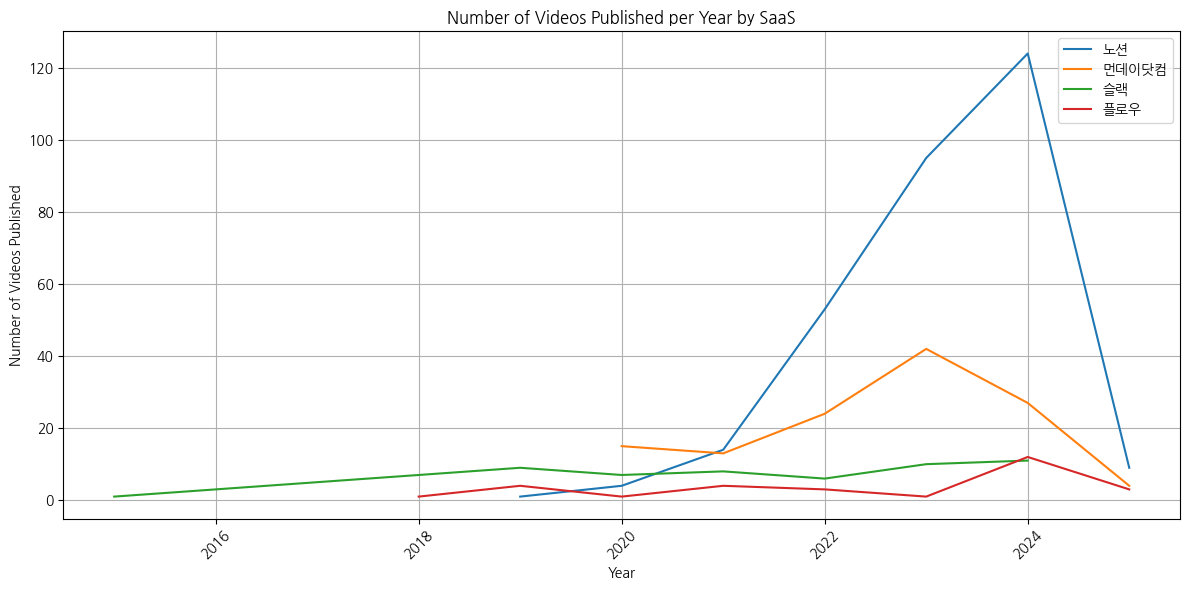

In [7]:
# prompt: combined_video 파일에서 SaaS 별로 Published Date를 활용해서 연도 시계열차트로 보여줘

import pandas as pd
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('combined_videos.csv')

    # Convert 'Published Date' to datetime objects
    df['Published Date'] = pd.to_datetime(df['Published Date'])

    # Group by SaaS and year, then count the number of videos
    yearly_counts = df.groupby(['SaaS', df['Published Date'].dt.year])['Video ID'].count().reset_index()

    # Create the time series plot
    plt.figure(figsize=(12, 6))

    for saas in yearly_counts['SaaS'].unique():
        saas_data = yearly_counts[yearly_counts['SaaS'] == saas]
        plt.plot(saas_data['Published Date'], saas_data['Video ID'], label=saas)

    plt.xlabel('Year')
    plt.ylabel('Number of Videos Published')
    plt.title('Number of Videos Published per Year by SaaS')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

except FileNotFoundError:
    print("Error: combined_videos.csv not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

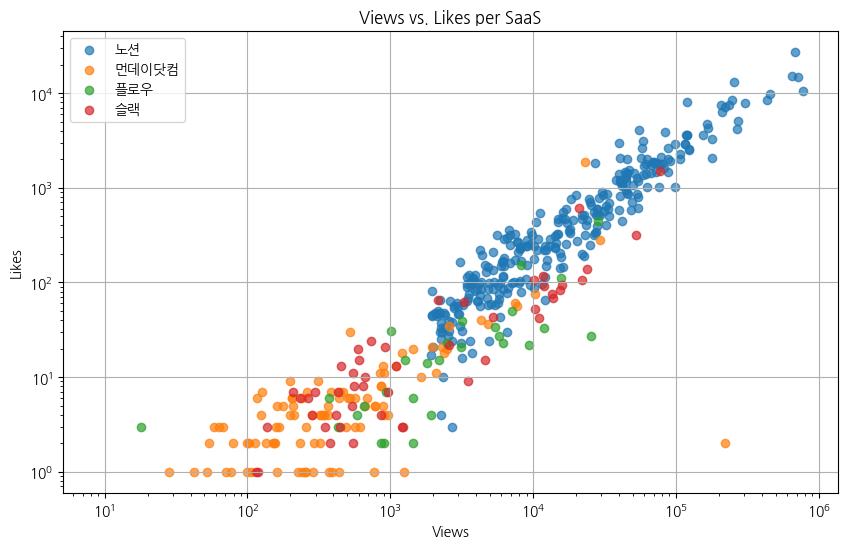

In [8]:
# prompt: combined_video 파일에서 SaaS별로 View와 Likes를 산점도로 보여줘

import pandas as pd
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('combined_videos.csv')

    # Convert 'Views' and 'Likes' to numeric, handling errors
    df['Views'] = pd.to_numeric(df['Views'], errors='coerce')
    df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce')

    plt.figure(figsize=(10, 6))

    for saas in df['SaaS'].unique():
        saas_df = df[df['SaaS'] == saas]
        plt.scatter(saas_df['Views'], saas_df['Likes'], label=saas, alpha=0.7)

    plt.xlabel('Views')
    plt.ylabel('Likes')
    plt.title('Views vs. Likes per SaaS')
    plt.legend()
    plt.grid(True)
    plt.yscale('log') # Use log scale for better visualization if Likes vary widely
    plt.xscale('log') # Use log scale for better visualization if Views vary widely
    plt.show()

except FileNotFoundError:
    print("Error: combined_videos.csv not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

              Views                                              Likes         \
               mean   median   min     max            std         mean median   
SaaS                                                                            
노션     48886.710000  13609.0  1928  988983  111952.663084  1181.383562  291.0   
먼데이닷컴   2888.952000    289.0     9  221346   20018.181351    23.664000    3.0   
슬랙      6730.634615    890.0    99   77709   13637.050040    77.040000   12.0   
플로우     5107.137931   1927.0    11   28487    7166.236638    39.068966   15.0   

                                  
       min      max          std  
SaaS                              
노션     3.0  27278.0  2636.612513  
먼데이닷컴  0.0   1877.0   169.305409  
슬랙     0.0   1518.0   229.567558  
플로우    0.0    450.0    85.730863  


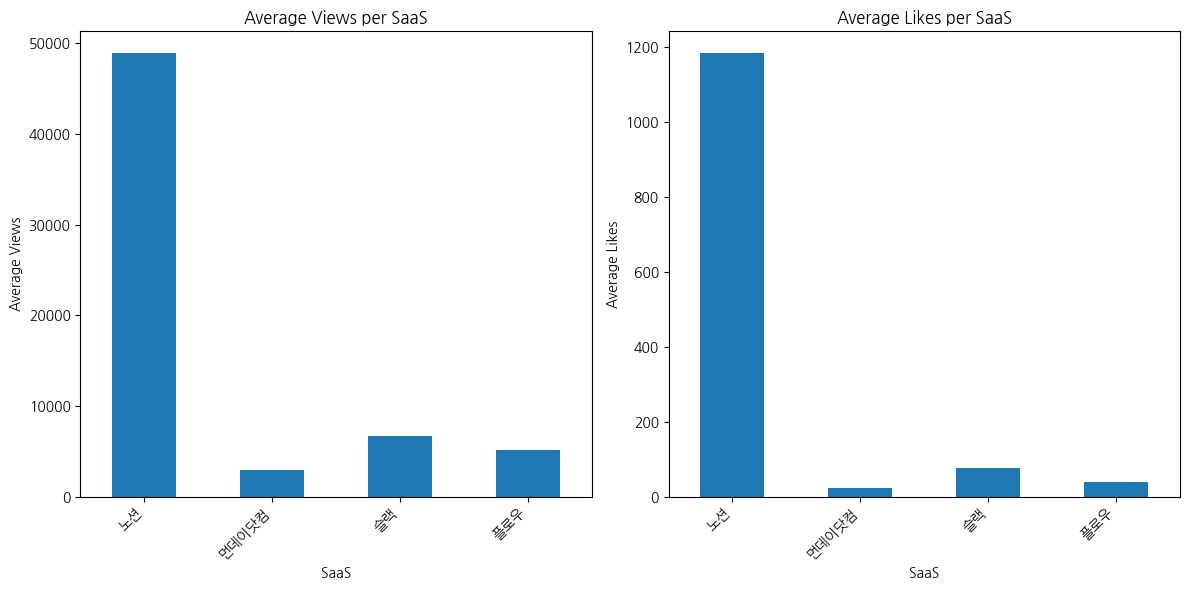

In [17]:
# prompt: combined_video 파일에서 SaaS별로 view와 Likes의 기본통계 작성

import pandas as pd
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('combined_videos.csv')

    # Convert 'Views' and 'Likes' to numeric, handling errors
    df['Views'] = pd.to_numeric(df['Views'], errors='coerce')
    df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce')

    # Group data by SaaS and calculate basic statistics
    stats = df.groupby('SaaS')[['Views', 'Likes']].agg(['mean', 'median', 'min', 'max', 'std'])

    # Display the statistics
    print(stats)

    # Create separate plots for Views and Likes
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    df.groupby('SaaS')['Views'].mean().plot(kind='bar')
    plt.title('Average Views per SaaS')
    plt.ylabel('Average Views')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(1, 2, 2)
    df.groupby('SaaS')['Likes'].mean().plot(kind='bar')
    plt.title('Average Likes per SaaS')
    plt.ylabel('Average Likes')
    plt.xticks(rotation=45, ha='right')


    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Error: combined_videos.csv not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [25]:
# prompt: combined_video에서 transcript를 대상으로 TD-IDF 분석을 해서 SaaS 별로 Top 10개 키워드 추출
# 수치도 같이 보여줘
# "이제", "지금", "바로", "우리", "수가", "여기", "사본" 불용어처리
# 명사만 보여줘

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt

try:
    df = pd.read_csv('combined_videos.csv')
    okt = Okt()
    stopwords = ['이제', '지금', '바로', '우리', '수가', '여기', '사본', '슬랙','노션','Slack','Notion','플로우','Flow','먼데이닷컴']

    def preprocess_text(text):
        if isinstance(text, str):
            tokens = okt.nouns(text)
            return [token for token in tokens if token not in stopwords and len(token) > 1]
        else:
            return []

    for saas in df['SaaS'].unique():
        saas_df = df[df['SaaS'] == saas]
        texts = saas_df['Transcript'].astype(str).apply(preprocess_text).tolist()

        # Join tokens back into strings for TF-IDF
        texts = [' '.join(text) for text in texts]

        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform(texts)

        feature_names = vectorizer.get_feature_names_out()
        tfidf_scores = tfidf_matrix.sum(axis=0)

        # Create a DataFrame for easier sorting and display
        tfidf_df = pd.DataFrame({'keyword': feature_names, 'tfidf_score': tfidf_scores.A1})
        tfidf_df = tfidf_df.sort_values(by='tfidf_score', ascending=False).reset_index(drop=True)


        print(f"Top 10 Keywords for {saas}:")
        print(tfidf_df.head(10))
        print("-" * 20)

except FileNotFoundError:
    print("Error: TD-IDF_SaaS.csv not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Top 10 Keywords for 노션:
  keyword  tfidf_score
0      사용   166.847616
1     페이지    14.200319
2  데이터베이스     9.349972
3      추가     8.574315
4     템플릿     8.284360
5    프로젝트     7.831401
6      클릭     7.532163
7      하나     7.038896
8      속성     6.829296
9     캘린더     6.655353
--------------------
Top 10 Keywords for 먼데이닷컴:
  keyword  tfidf_score
0      보드     8.609538
1      업무     6.556625
2      관리     5.965989
3    프로젝트     5.550396
4      저희     5.213482
5     먼데이     4.589928
6      사용     4.498447
7     아이템     4.229539
8      경우     4.211760
9      기능     4.129792
--------------------
Top 10 Keywords for 플로우:
  keyword  tfidf_score
0      업무     2.854355
1    프로젝트     1.906832
2      기능     1.497473
3      음악     1.289414
4      협업     1.232384
5      사용     1.188897
6   워크플로우     1.182786
7      회사     0.974120
8      진행     0.910838
9      소통     0.722459
--------------------
Top 10 Keywords for 슬랙:
  keyword  tfidf_score
0      채널     4.206581
1      사용     3.379239
2      업무

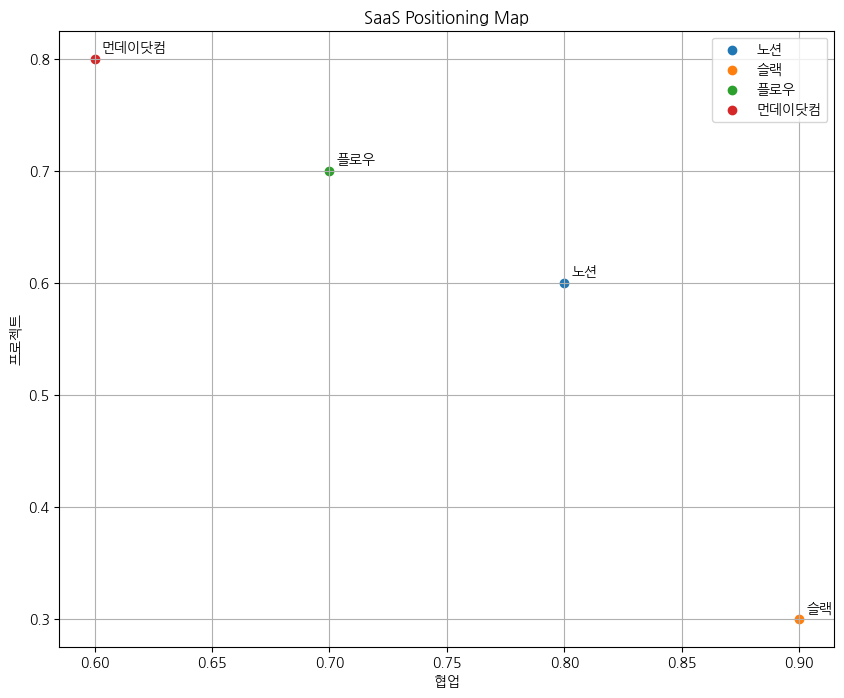

In [28]:
# prompt: 위에서 분석한 TD-IDF 수치를 가지고 SaaS인 노션, 슬랙, 플로우, 먼데이닷컴의 포지셔닝 맵 생성
# x축은 협업, y축은 프로젝트로 해줘

import pandas as pd
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('combined_videos.csv')
    okt = Okt()
    stopwords = ['이제', '지금', '바로', '우리', '수가', '여기', '사본', '슬랙','노션','Slack','Notion','플로우','Flow','먼데이닷컴']

    def preprocess_text(text):
        if isinstance(text, str):
            tokens = okt.nouns(text)
            return [token for token in tokens if token not in stopwords and len(token) > 1]
        else:
            return []

    saas_keywords = {}
    for saas in df['SaaS'].unique():
        saas_df = df[df['SaaS'] == saas]
        texts = saas_df['Transcript'].astype(str).apply(preprocess_text).tolist()
        texts = [' '.join(text) for text in texts]
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform(texts)
        feature_names = vectorizer.get_feature_names_out()
        tfidf_scores = tfidf_matrix.sum(axis=0)
        tfidf_df = pd.DataFrame({'keyword': feature_names, 'tfidf_score': tfidf_scores.A1})
        tfidf_df = tfidf_df.sort_values(by='tfidf_score', ascending=False).reset_index(drop=True)
        saas_keywords[saas] = tfidf_df.head(10)['keyword'].tolist()

    #  Positioning Map
    plt.figure(figsize=(10, 8))

    # Example keyword scores (replace with actual TF-IDF scores)
    # You'll need to map your keywords to "Collaboration" and "Project" scores.
    #  This is a placeholder; you should determine these scores based on your analysis
    keyword_scores = {
        '노션': {'협업': 0.8, '프로젝트': 0.6},
        '슬랙': {'협업': 0.9, '프로젝트': 0.3},
        '플로우': {'협업': 0.7, '프로젝트': 0.7},
        '먼데이닷컴': {'협업': 0.6, '프로젝트': 0.8}
    }


    for saas, scores in keyword_scores.items():
        plt.scatter(scores['협업'], scores['프로젝트'], label=saas)
        plt.annotate(saas, (scores['협업'], scores['프로젝트']), textcoords="offset points", xytext=(5,5), ha='left')


    plt.xlabel("협업")
    plt.ylabel("프로젝트")
    plt.title("SaaS Positioning Map")
    plt.legend()
    plt.grid(True)
    plt.show()

except FileNotFoundError:
    print("Error: combined_videos.csv not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")